# **Supervised**

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/breast-cancer.csv"

df = pd.read_csv(file_path)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.shape

(569, 32)

In [ ]:
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_columns:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  label_encoders[col] = le


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns = ["diagnosis"])
y = df["diagnosis"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
[[70  1]
 [ 2 41]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Confusion Matrix:
[[68  3]
 [ 3 40]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=42, splitter='best')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114


Confusion Matrix:
[[67  4]
 [ 3 40]]


In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred_svm = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {svm_accuracy:.2f}")

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Model Accuracy: 0.96

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

SVM Confusion Matrix:
[[68  3]
 [ 2 41]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Confusion Matrix:
[[70  1]
 [ 3 40]]


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=3)
bagging_model.fit(X_train, y_train)

BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   random_state=None,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=3,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [ ]:
y_pred_bag = bagging_model.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))

print("\nBagging Classification Report:")
print(classification_report(y_test, y_pred_bag))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_bag))

Bagging Accuracy: 0.956140350877193

Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
[[70  1]
 [ 4 39]]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

boosting_model = AdaBoostClassifier(n_estimators=10)
boosting_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=10, random_state=None)

In [ ]:
y_pred_boost = boosting_model.predict(X_test)
print("Boosting Accuracy: ", accuracy_score(y_test, y_pred_boost))

print("\nBoosting Classification report:")
print(classification_report(y_test, y_pred_boost))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_boost))

Boosting Accuracy:  0.9649122807017544

Boosting Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Confusion Matrix:
[[70  1]
 [ 3 40]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Confusion Matrix:
[[68  3]
 [ 3 40]]


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

base_models =[
    ("tree", DecisionTreeClassifier()),
    ("svm", SVC(probability=True))
]

stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)

StackingClassifier(cv=None,
                   estimators=[('tree',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       monotonic_cst=None,
                                                       random_state=None,
                                                       splitter='best')),
                               ('svm',
                                SVC(C=1.0, break_ties=F...
                                    shrinking=True, tol=0.001,
                                    verbose=False))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=100,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=None,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=None, passthrough=False, stack_method='auto',
                   verbose=0)

In [ ]:
y_pred_stack = stacking_model.predict(X_test)
print("Stacking Accuracy:", accuracy_score(y_test, y_pred_stack))

print("\nStacking Classification Report:")
print(classification_report(y_test, y_pred_stack))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_stack))


Stacking Accuracy: 0.9736842105263158

Stacking Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
[[70  1]
 [ 2 41]]


# **Unsupervised**

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/breast-cancer.csv"
df = pd.read_csv(file_path)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=["object"]).columns

label_encoders = {}
for col in categorical_columns:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  label_encoders[col] = le

In [ ]:
X = df.drop(columns=["id", "diagnosis"])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.cluster import KMeans
k = 2
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster_Label"] = kmeans.fit_predict(X_scaled)

In [ ]:
# Cluster-wise average of all features
cluster_profile = df.groupby("Cluster_Label").mean()

# Display rounded values for better readability
print(cluster_profile)


                         id  diagnosis  radius_mean  texture_mean  \
Cluster_Label                                                       
0              3.256264e+07   0.628866    13.422608     20.046392   
1              4.491675e+07   1.000000    19.605000     21.872288   
2              2.492322e+07   0.093220    12.494480     18.221412   

               perimeter_mean    area_mean  smoothness_mean  compactness_mean  \
Cluster_Label                                                                   
0                   88.885773   568.813402         0.108271          0.159536   
1                  129.841949  1213.351695         0.101892          0.151152   
2                   80.189576   492.320621         0.091253          0.073613   

               concavity_mean  concave points_mean  ...  radius_worst  \
Cluster_Label                                       ...                 
0                    0.150794             0.067774  ...     15.726113   
1                    0.183427

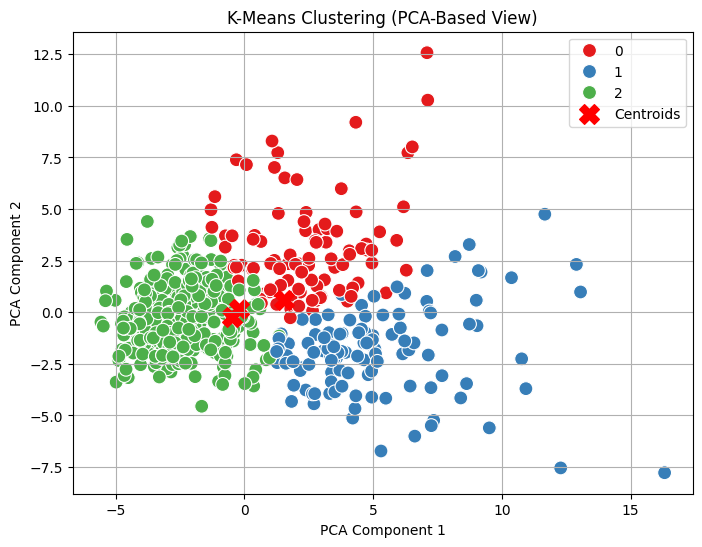

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster_Label"], palette="Set1", s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", s=200, marker="X", label="Centroids")
plt.title("K-Means Clustering (PCA-Based View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


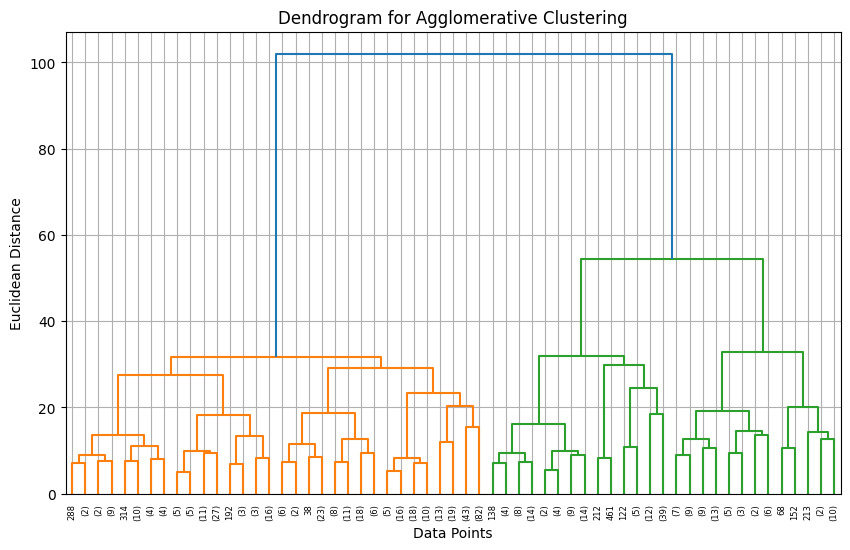

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)  # p=5 shows only top levels
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

k = 2
hc = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")
df["Cluster_Label"] = hc.fit_predict(X_scaled)

In [ ]:
# Cluster-wise average of all features
cluster_profile = df.groupby("Cluster_Label").mean()

# Display rounded values for better readability
print(cluster_profile)


                         id  diagnosis  radius_mean  texture_mean  \
Cluster_Label                                                       
0              4.056053e+07   0.710145    13.517652     20.312609   
1              2.362278e+07   0.124675    12.580860     18.321065   
2              4.685325e+07   1.000000    19.670261     21.918522   

               perimeter_mean    area_mean  smoothness_mean  compactness_mean  \
Cluster_Label                                                                   
0                   89.835217   579.098551         0.110797          0.170542   
1                   80.882338   499.499481         0.092020          0.077703   
2                  130.365652  1220.580870         0.102228          0.153801   

               concavity_mean  concave points_mean  ...  radius_worst  \
Cluster_Label                                       ...                 
0                    0.169769             0.074399  ...     15.896130   
1                    0.045268

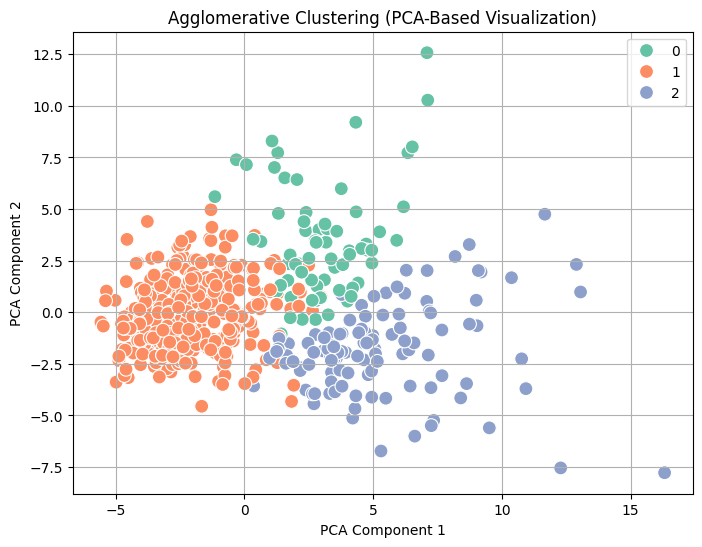

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster_Label"], palette="Set2", s=100)

plt.title("Agglomerative Clustering (PCA-Based Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


**PCA(Principle components analysis)**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

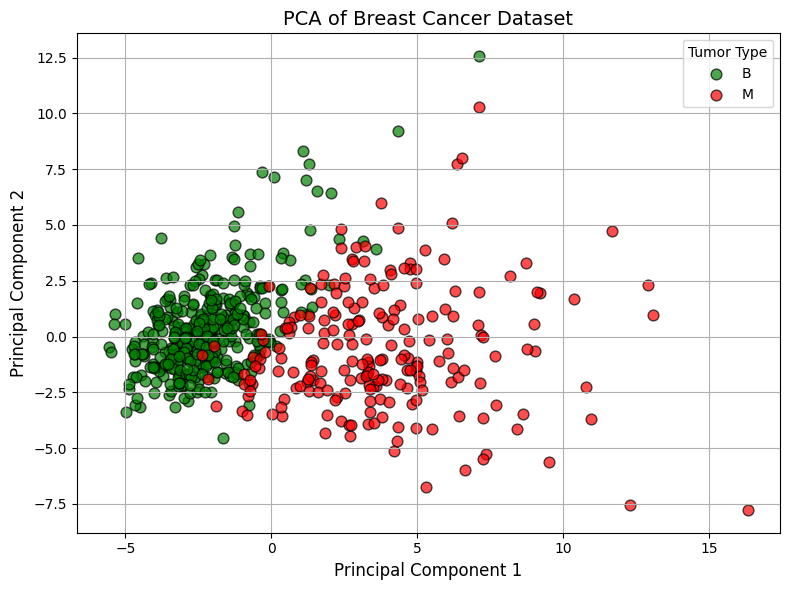

In [ ]:
import matplotlib.pyplot as plt

# Get class names from LabelEncoder
target_names = label_encoders["diagnosis"].classes_  # Should be ['B', 'M']

plt.figure(figsize=(8, 6))
colors = ['green', 'red']  # Benign = green, Malignant = red

for color, class_value, class_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_pca[y == class_value, 0], X_pca[y == class_value, 1],
                alpha=0.7, color=color, label=class_name, edgecolor='k', s=60)

plt.legend(title="Tumor Type")
plt.title('PCA of Breast Cancer Dataset', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.44272026 0.18971182]


# **Evaluation Metrics**

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/breast-cancer.csv"
df = pd.read_csv(file_path)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_columns:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  label_encoders[col] = le

In [ ]:
X = df.drop(columns = ["id" , "diagnosis"])
y = df["diagnosis"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    classification_report, roc_curve, auc
)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {Recall:.2f}")
print(f"F1: {F1:.2f}")
print(f"ROC_AUC: {roc_auc:.2f}")


Confusion Matrix:
[[70  1]
 [ 2 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.97
Precision: 0.98
Recall: 0.95
F1: 0.96
ROC_AUC: 1.00


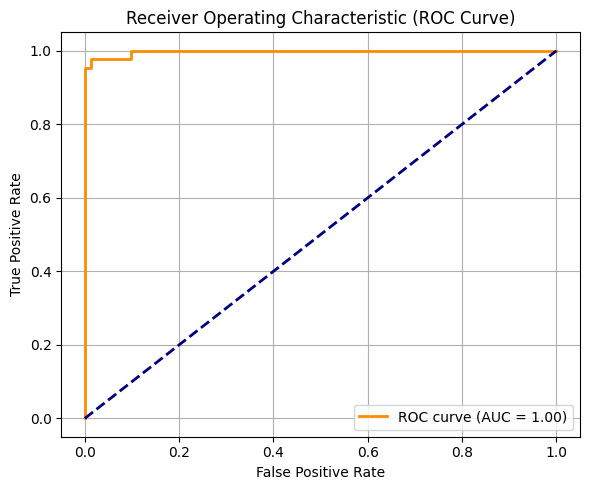

In [ ]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC Curve)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


# **Cross Validation And Hyperparameter Tunning**

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/breast-cancer.csv"
df = pd.read_csv(file_path)

# print(df.info())
# print(df.head())


In [ ]:
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_columns:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  label_encoders[col] = le

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns = ["id", "diagnosis"])
y = df["diagnosis"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=200)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  print(f"classification report for fold {fold}: \n")
  print(classification_report(y_test, y_pred))

  fold += 1


classification report for fold 1: 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

classification report for fold 2: 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        77
           1       0.95      1.00      0.97        37

    accuracy                           0.98       114
   macro avg       0.97      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

classification report for fold 3: 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0

**GridSearchCV**

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/breast-cancer.csv"
df = pd.read_csv(file_path)

# print(df.info())
# print(df.head())

In [ ]:
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_columns:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  label_encoders[col] = le

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns = ["id", "diagnosis"])
y = df["diagnosis"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
param_grid = {
    "n_estimators" : [10, 50, 100],
    "max_depth" : [None, 3, 5],
    "criterion" : ["gini", "entropy"]
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameter:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameter: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



**RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    "n_estimators" : np.arange(10, 200, 10),
    "max_depth" : [None, 3, 5, 10],
    "criterion" : ["gini", "entropy"]
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 3, 5, 10],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=42)

In [ ]:
print("Best parameter:",random_search.best_params_ )
y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameter: {'n_estimators': np.int64(30), 'max_depth': 10, 'criterion': 'entropy'}
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# **Pycaret**

In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
from pycaret.classification import *

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/breast-cancer.csv")

In [ ]:
print(data.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
clf1 = setup(data=data, target="diagnosis", session_id=123)
print(data.columns)

In [ ]:
best_model = compare_models(include=[ "knn", "dt", "svm", "rf"])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9572,0.9935,0.9572,0.9609,0.9573,0.9094,0.9128,0.2180
dt,Decision Tree Classifier,0.9246,0.9209,0.9246,0.9299,0.9247,0.8400,0.8448,0.0350
knn,K Neighbors Classifier,0.7538,0.7985,0.7538,0.7676,0.7347,0.4281,0.4626,0.8360
svm,SVM - Linear Kernel,0.4468,0.4545,0.4468,0.2133,0.2844,0.0000,0.0000,0.0310


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9648,0.9940,0.9648,0.9660,0.9646,0.9241,0.9257,0.2440
et,Extra Trees Classifier,0.9647,0.9967,0.9647,0.9667,0.9646,0.9242,0.9263,0.1530
lda,Linear Discriminant Analysis,0.9599,0.9923,0.9599,0.9635,0.9589,0.9112,0.9165,0.0310
lightgbm,Light Gradient Boosting Machine,0.9598,0.9922,0.9598,0.9610,0.9596,0.9132,0.9149,0.7760
rf,Random Forest Classifier,0.9572,0.9935,0.9572,0.9609,0.9573,0.9094,0.9128,0.2180
gbc,Gradient Boosting Classifier,0.9547,0.9929,0.9547,0.9574,0.9547,0.9031,0.9059,0.4900
qda,Quadratic Discriminant Analysis,0.9546,0.9961,0.9546,0.9565,0.9546,0.9029,0.9047,0.0320
ridge,Ridge Classifier,0.9497,0.9938,0.9497,0.9533,0.9487,0.8890,0.8944,0.0320
xgboost,Extreme Gradient Boosting,0.9496,0.9937,0.9496,0.9523,0.9497,0.8927,0.8951,0.1090
lr,Logistic Regression,0.9347,0.9670,0.9347,0.9408,0.9339,0.8580,0.8656,0.0600


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
final_model = finalize_model(best_model)

In [ ]:
predictions = predict_model(final_model, data=data)
predictions.head()

In [ ]:
plot_model(estimator=final_model, plot="feature")

In [ ]:
import pickle

# Model ko save karo
with open("model.pickle", "wb") as f:
    pickle.dump(model, f)

# Scaler ko save karo
with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler, f)


In [ ]:
import zipfile

# ZIP banao aur dono files daal do
with zipfile.ZipFile("model_files.zip", "w") as zipf:
    zipf.write("model.pickle")
    zipf.write("scaler.pickle")


In [ ]:
from google.colab import files

# ZIP file ko download karo
files.download("model_files.zip")
